In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [84]:
from fastai.basics import *

# import lmfit
# from lmfit.models import *
# from lmfit.lineshapes import *
# from lmfit import Parameters, fit_report, minimize
import glob
import os
import pandas as pd

In [109]:
p = Path('../data/Raman Ana/')
p.ls()

[PosixPath('../data/Raman Ana/GO_HNO3_5G_inttime20_lasepower33.8.lib'),
 PosixPath('../data/Raman Ana/coal_oxidizer_30inttime.lib'),
 PosixPath('../data/Raman Ana/coalchar_hummer_30inttime.lib'),
 PosixPath('../data/Raman Ana/GO_HNO3_5Gstar_20inttime_2.lib'),
 PosixPath('../data/Raman Ana/GO_HNO3_5Gstar_20inttime.spc'),
 PosixPath('../data/Raman Ana/GOHNO3_20INTTIME.spc'),
 PosixPath('../data/Raman Ana/Go_hummer_20inttime.spc'),
 PosixPath('../data/Raman Ana/GO_HNO3_5Gstar_5inttime_laser33.8.spc'),
 PosixPath('../data/Raman Ana/GO_HNO3_5Gstar_30inttime.lib'),
 PosixPath('../data/Raman Ana/GO_HNO3_33.8LASER_5INTTIME_09_24.txt'),
 PosixPath('../data/Raman Ana/Go_hummer_30inttime.lib'),
 PosixPath('../data/Raman Ana/coalchar_oxidizer_30inttime.txt'),
 PosixPath('../data/Raman Ana/GO_3STEPS_2HR.spc'),
 PosixPath('../data/Raman Ana/.DS_Store'),
 PosixPath('../data/Raman Ana/coalchar_oxidizer_20inttime.lib'),
 PosixPath('../data/Raman Ana/Go_hummer_20inttime.txt'),
 PosixPath('../data/Raman 

In [119]:
# for n in p.rglob("*.[tT][xX][tT]"):
#     parent=list(n.parents[0])
#     child=list(n.name)
    
parent=[x.parents[0] for x in p.rglob("*.[tT][xX][tT]")]
child=[x.name for x in p.rglob("*.[tT][xX][tT]")]

In [125]:
child

['GO_HNO3_33.8LASER_5INTTIME_09_24.txt',
 'coalchar_oxidizer_30inttime.txt',
 'Go_hummer_20inttime.txt',
 'GO_HNO3_5Gstar_20inttime.txt',
 'GO_HNO3_5Gstar_5inttime_laser33.8.txt',
 'Go_oxidizer_30inttime.txt',
 'coalchar_hummer_30inttime.txt',
 'coal_oxidizer_30inttime.txt',
 'GO_HNO3_5G_inttime20_lasepower33.8.txt',
 'GO_HNO3_5Gstar_20inttime_2.txt',
 'GO_HNO3_5Gstar_30inttime.txt',
 'Go_hummer_30inttime.txt',
 'coalchar_oxidizer_20inttime.txt',
 'GO_3STEPS_1HR_GO_09_24.txt',
 'coal_hummers_30inttime.txt',
 'Go_oxidizer_20inttime.txt',
 'GO_3STEPS_1HR_GO_09_24_inttime5_lasepower33.8.txt',
 'coal EL oxidizer method 2.txt',
 'coal el char oxidizer 2 better.txt',
 'coal hummers5.txt',
 'Coal EL char oxidizer.txt',
 'Coal EL char oxidizer 3 okay too.txt',
 'graphene oxide from graphenea company.txt',
 'biochar oxidizer.txt',
 'coal hummers meio ruim.txt',
 'coal EL char hummers 2.txt',
 'biochar hummers.txt',
 'graphene oxide from graphenea company 2.txt',
 'coal EL char hummers.txt',
 'c

In [96]:
fnames = []
for n in p.rglob('*.txt'): fnames.append(n.name)
fnames[:5]

['GO_HNO3_33.8LASER_5INTTIME_09_24.txt',
 'coalchar_oxidizer_30inttime.txt',
 'Go_hummer_20inttime.txt',
 'GO_HNO3_5Gstar_20inttime.txt',
 'GO_HNO3_5Gstar_5inttime_laser33.8.txt']

In [108]:
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""  # fastai work-around LazyConfigValue problem
df_ = pd.read_csv(parent[61]/child[61],names=['Energy',fnames[0]],header=None, delimiter = '\t')
df_.head()

,Energy,GO_HNO3_33.8LASER_5INTTIME_09_24.txt
0,200.0,1417.026
1,201.0,1446.209
2,202.0,1475.391
3,203.0,1504.574
4,204.0,1539.777


In [123]:
def load_data(parent, child):
    dfs=[]
    for p,c in zip(parent,child):
        dfs.append(pd.read_csv(p/c, names=['Energy',
                   c], header=None, delimiter = '\t'))
    return pd.concat(dfs,axis=1).T.drop_duplicates().T  # care: works only when all E column values are the same

In [124]:
df=load_data(parent,child)
df.head()

,Energy,GO_HNO3_33.8LASER_5INTTIME_09_24.txt,coalchar_oxidizer_30inttime.txt,Go_hummer_20inttime.txt,GO_HNO3_5Gstar_20inttime.txt,GO_HNO3_5Gstar_5inttime_laser33.8.txt,Go_oxidizer_30inttime.txt,coalchar_hummer_30inttime.txt,coal_oxidizer_30inttime.txt,GO_HNO3_5G_inttime20_lasepower33.8.txt,...,CoalEL_HNO3_33.8laser_30inttime.txt,CoalChar_Hummers_33.8laser_20inttime.txt,CoalChar_HNO3_33.8laser_20inttime.txt,Biohar_Hummers_33.8laser_30inttime.txt,Coal_HNO3_33.8LASER_20INTTIME.txt,Biohar_HNO3_33.8laser_20inttime.txt,CoalChar_Hummers_33.8laser_30inttime.txt,CoalEL_HNO3_33.8laser_20inttime.txt,Biohar_HNO3_33.8laser_30inttime_2.txt,CoalEL_Hummers.33.8laser_30inttime.txt
0,200.0,429.056,1881.845,1174.111,1478.076,563.483,2144.423,2110.007,2396.635,1938.885,...,4654.685,1363.0,1821.508,1928.946,2170.840,1236.116,1890.760,2644.760,1891.861,3032.831
1,201.0,437.949,1922.145,1191.899,1510.316,570.709,2192.228,2171.151,2468.341,1970.569,...,4729.449,1390.0,1857.917,1975.360,2205.304,1259.740,1942.455,2696.455,1949.670,3110.930
2,202.0,446.843,1962.445,1209.686,1542.556,577.935,2240.032,2232.296,2540.047,2002.254,...,4804.212,1417.0,1894.326,2021.775,2239.767,1283.364,1994.151,2748.151,2007.480,3189.028
3,203.0,455.737,2002.745,1227.474,1574.796,585.161,2287.836,2293.441,2611.754,2033.938,...,4878.976,1444.0,1930.735,2068.189,2274.230,1306.989,2045.846,2799.846,2065.290,3267.127
4,204.0,459.866,2050.313,1252.522,1609.119,596.536,2327.570,2344.033,2655.705,2064.388,...,4993.563,1474.0,1963.424,2110.058,2321.557,1336.632,2103.568,2844.509,2111.301,3344.421


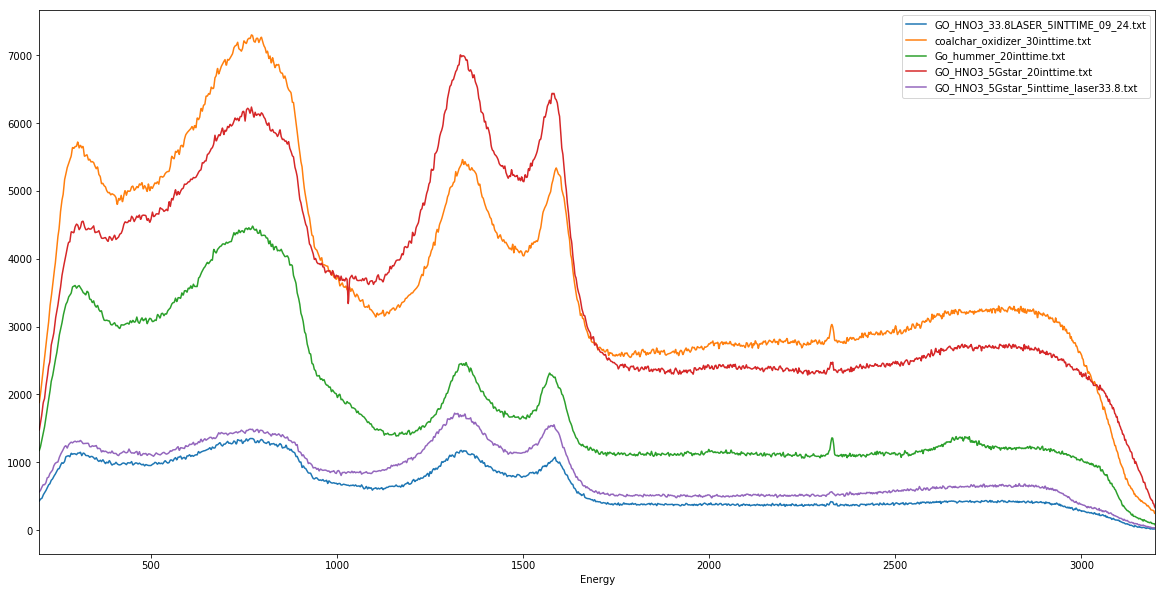

In [126]:
df.plot(x='Energy',y=child[:5],figsize=(20,10))

KeyError: 'CoalChar_HNO3_33.8laser_30inttime.txt'

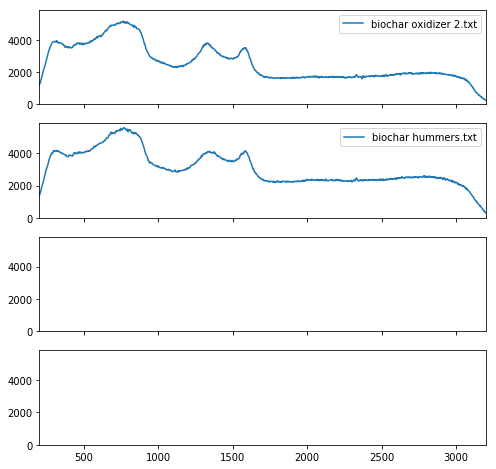

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=1, 
                         sharex=True, sharey=True, figsize=(8,8))
df.plot(x='Energy', y='biochar oxidizer 2.txt', ax=axes[0])
df.plot(x='Energy', y='biochar hummers.txt', ax=axes[1])
df.plot(x='Energy', y='CoalChar_HNO3_33.8laser_30inttime.txt', ax=axes[2])
df.plot(x='Energy', y=fnames[3], ax=axes[3])
fig.tight_layout()

# Bring subplots close to each other and positioned further to the right
fig.subplots_adjust(hspace=0, left=0.1, bottom=0.08)

# Hide x labels and tick labels for all but bottom plot.
for ax in axes:
    ax.xaxis.label.set_visible(False)
    ax.tick_params(axis='both', which='both', direction='in',top=True)
                    #     ax.label_outer()

fig.suptitle('Raman overview GO', y=1.02, fontsize=20)
fig.text(0.5, 0.01, r'Wavenumber [$cm^{-1}$]', fontsize=20, ha='center')
fig.text(0, 0.5, 'Intensity a.u.', fontsize=20, va='center', rotation='vertical')